In [1]:
import pandas as pd
train_data = pd.read_csv(r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\features\statistic_features\train.csv')
val_data = pd.read_csv(r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\features\statistic_features\validation.csv')
test_data = pd.read_csv(r'D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\features\statistic_features\test.csv')

X_train = train_data.drop(columns=['label', 'file_path'])
y_train = train_data['label']

X_val = val_data.drop(columns=['label', 'file_path'])
y_val = val_data['label']

X_test = test_data.drop(columns=['label', 'file_path'])
y_test = test_data['label']

In [2]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((26921, 310), (26921,), (3369, 310), (3369,), (3336, 310), (3336,))

In [3]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_val = scaler.transform(X_val)
# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

In [5]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_valcnn= np.expand_dims(X_val, axis=2)
x_traincnn.shape, y_train.shape, x_valcnn.shape, y_val.shape

((26921, 310, 1), (26921, 7), (3369, 310, 1), (3369, 7))

In [6]:
import tensorflow.keras.layers as L
import tensorflow as tf

model = tf.keras.Sequential([
    L.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    L.BatchNormalization(),
    L.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling1D(pool_size=2, strides=2, padding='same'),
    L.Dropout(0.3),
    
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling1D(pool_size=2, strides=2, padding='same'),
    L.Dropout(0.3),
    
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling1D(pool_size=2, strides=2, padding='same'),
    L.Dropout(0.3),
    
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dropout(0.5),
    L.Dense(7, activation='softmax')
])


from keras.optimizers import Adam
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# In ra thông tin tóm tắt về mô hình
model.summary()


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 310, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 310, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 310, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 310, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 155, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 155, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 155, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 155, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 155, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 155, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 78, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 78, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 78, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 78, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 78, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 78, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 39, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 39, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9984)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,112,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,503,559 (20.99 MB)

 Trainable params: 5,500,743 (20.98 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

cnn_model_checkpoint = ModelCheckpoint('best_cnn_model_weights.keras', monitor='val_accuracy', save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
#

In [8]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_valcnn, y_val), batch_size=64,callbacks=[early_stop,lr_reduction,cnn_model_checkpoint])

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.2685 - loss: 2.4942 - val_accuracy: 0.3989 - val_loss: 1.6125 - learning_rate: 1.0000e-04
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.3972 - loss: 1.8157 - val_accuracy: 0.5052 - val_loss: 1.3028 - learning_rate: 1.0000e-04
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.4556 - loss: 1.5679 - val_accuracy: 0.4901 - val_loss: 1.3388 - learning_rate: 1.0000e-04
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.4897 - loss: 1.4172 - val_accuracy: 0.4984 - val_loss: 1.2978 - learning_rate: 1.0000e-04
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.5121 - loss: 1.3182 - val_accuracy: 0.5497 - val_loss: 1.1283 - learning_rate: 1.0000e-04
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.5340 - loss: 1.2377 - val_accuracy: 0.5462 - val_loss: 1.1389 - learning_rate: 1.0000e-04
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/ste

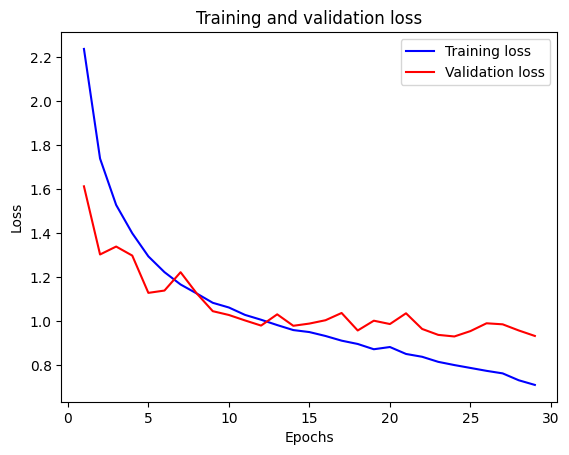

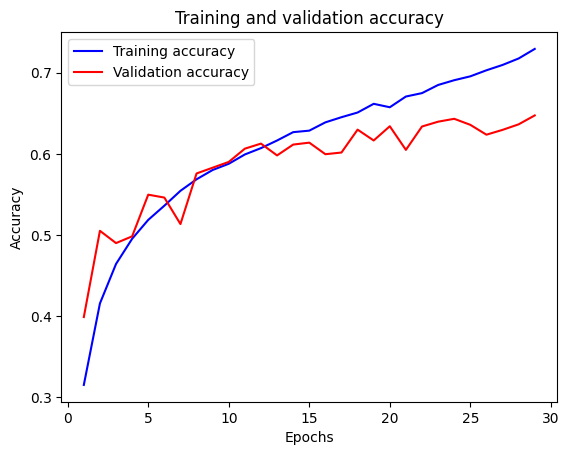

In [9]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ Loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ biểu đồ Accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
from keras.models import load_model

# Load mô hình đã được lưu
model = load_model('best_cnn_model_weights.keras')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6500 - loss: 0.9190
Test Loss: 0.9449647068977356
Test Accuracy: 0.6384891867637634


In [11]:
lstm_model = tf.keras.Sequential([
    L.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    L.BatchNormalization(),
    L.Dropout(0.3),
    
    L.LSTM(128, return_sequences=True),
    L.BatchNormalization(),
    L.Dropout(0.3),
    
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dropout(0.5),
    L.Dense(7, activation='softmax')
])

from keras.optimizers import Adam
learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)
lstm_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# In ra thông tin tóm tắt về mô hình
lstm_model.summary()

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 310, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 310, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 310, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 310, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 310, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 310, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 39680)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    20,316,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,438,791 (77.97 MB)

 Trainable params: 20,437,383 (77.96 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

lstm_model_checkpoint = ModelCheckpoint('best_lstm_model_weights.keras', monitor='val_accuracy', save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [13]:
lstm_history=lstm_model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_valcnn, y_val), batch_size=128,callbacks=[early_stop,lr_reduction,lstm_model_checkpoint])

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 130s 607ms/step - accuracy: 0.4467 - loss: 1.7768 - val_accuracy: 0.2511 - val_loss: 2.0718 - learning_rate: 5.0000e-04
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 130s 617ms/step - accuracy: 0.5702 - loss: 1.1514 - val_accuracy: 0.4785 - val_loss: 1.3130 - learning_rate: 5.0000e-04
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 132s 627ms/step - accuracy: 0.6032 - loss: 1.0366 - val_accuracy: 0.6052 - val_loss: 1.0213 - learning_rate: 5.0000e-04
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 128s 609ms/step - accuracy: 0.6261 - loss: 0.9689 - val_accuracy: 0.5669 - val_loss: 1.2174 - learning_rate: 5.0000e-04
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 140s 663ms/step - accuracy: 0.6444 - loss: 0.9262 - val_accuracy: 0.6023 - val_loss: 1.0737 - learning_rate: 5.0000e-04
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.6573 - loss: 0.8924
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
211/211 ━━━━━━━━━━━━━━━━━━━━ 179s 84

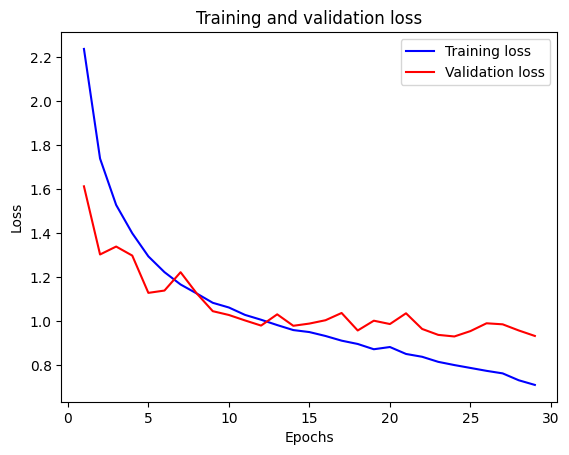

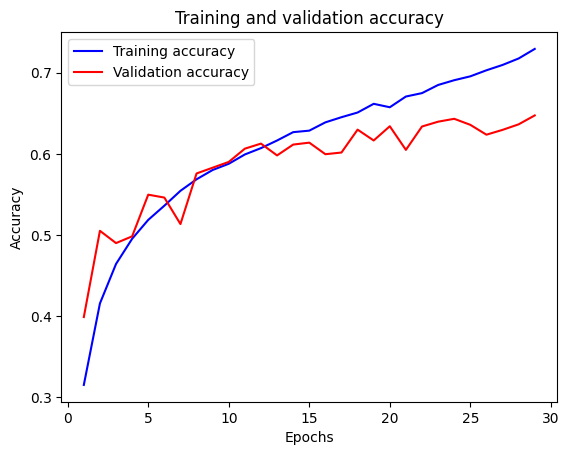

In [14]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ Loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ biểu đồ Accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from keras.models import load_model

# Load mô hình đã được lưu
lstm_model = load_model('best_lstm_model_weights.keras')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.6701 - loss: 0.9034
Test Loss: 0.9408957362174988
Test Accuracy: 0.6417865753173828
